In [52]:

# Análisis Descriptivo de los datos
# Autor: Marcos Ulises Sánchez

# Carga de librerías necesarias, lo dejamos en un bloque para que sea más fácil de identificar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Verificamos que el set de datos se haya cargado correctamente
df = pd.read_csv('worldwide_coffee_habits.csv')
df.head()

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


In [5]:
# Descripción de los datos
display(df.describe())
display(df.info())

,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Population (millions)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2011.666900,6.061865,9.461891,75.167120
std,6.911695,2.313427,3.151403,43.023176
min,2000.000000,2.000385,4.000742,1.002494
25%,2006.000000,4.070743,6.728261,37.465847
50%,2012.000000,6.094491,9.458371,75.021943
75%,2018.000000,8.061127,12.136285,112.595868
max,2023.000000,9.999399,14.997053,149.995850


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      10000 non-null  object 
 1   Year                                         10000 non-null  int64  
 2   Coffee Consumption (kg per capita per year)  10000 non-null  float64
 3   Average Coffee Price (USD per kg)            10000 non-null  float64
 4   Type of Coffee Consumed                      10000 non-null  object 
 5   Population (millions)                        10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


None

In [50]:
# Crearé una tabla de distribución de frecuencias para las variables categóricas
# Country
# Type of Coffee Consumed

country_freq = df['Country'].value_counts().to_frame().reset_index()
country_freq.columns = ['Country', 'Frequency']

# El data set tiene los paises con el formato Country_number
# Convertiré el país a una columna numérica

country_freq['Country_id'] = country_freq['Country'].str.split('_').str[1]
country_freq['Country_id'] = country_freq['Country_id'].astype(int)

country_freq = country_freq.sort_values(by='Country_id')
display(country_freq)

# Creamos la tabla de distribución de frecuencias del tipo de café
coffee_freq = df['Type of Coffee Consumed'].value_counts().to_frame().reset_index()
coffee_freq.columns = ['Type of Coffee', 'Frequency']
display(coffee_freq)


,Country,Frequency,Country_id
43,Country_1,181,1
17,Country_2,205,2
28,Country_3,197,3
25,Country_4,201,4
29,Country_5,195,5
32,Country_6,194,6
47,Country_7,172,7
19,Country_8,205,8
39,Country_9,189,9
42,Country_10,183,10


,Type of Coffee,Frequency
0,Latte,2071
1,Cappuccino,2001
2,Mocha,1984
3,Americano,1975
4,Espresso,1969


C:\Users\marco\AppData\Local\Temp\ipykernel_17600\1263139216.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(country_coffee['Coffee Consumption (kg per capita per year)'], shade=True)


Text(0, 0.5, 'Densidad')

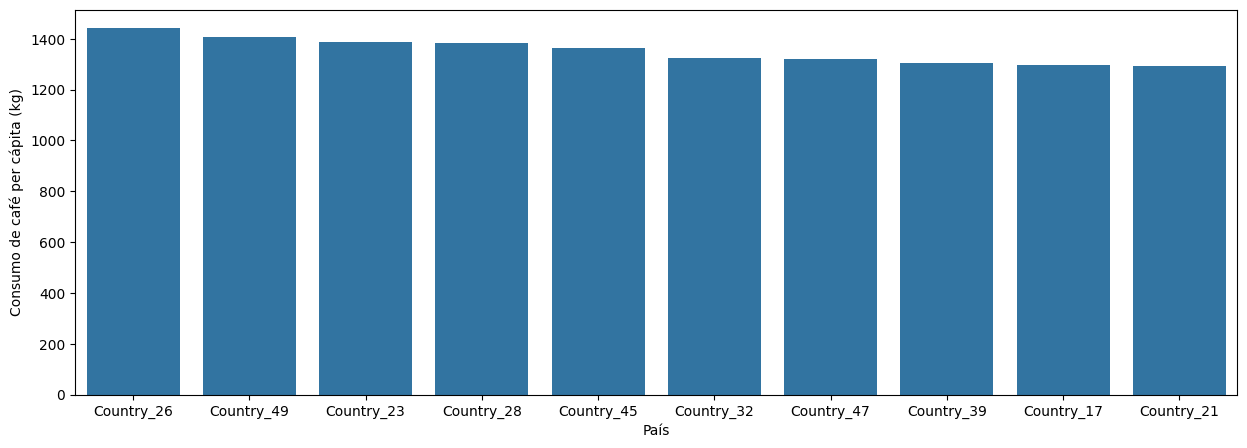

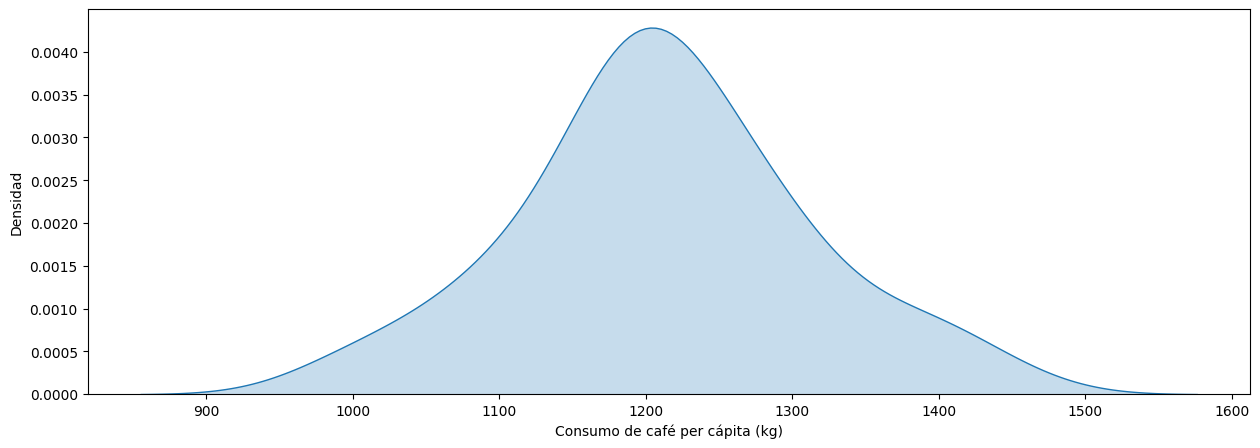

In [63]:
# Resumen gráfico de las variables

# Gráfico del consumo de café por país
# Debo agrupar los datos por país y sumar el consumo de café
country_coffee = df.groupby('Country')['Coffee Consumption (kg per capita per year)'].sum().reset_index()
# Gráfico de barras
plt.figure(figsize=(15, 5))
plt.xlabel('País')
plt.ylabel('Consumo de café per cápita (kg)')
sns.barplot(x='Country', y='Coffee Consumption (kg per capita per year)',
            data=country_coffee.sort_values(by='Coffee Consumption (kg per capita per year)', ascending=False).head(10))

# Este gráfico no nos da muchos insights, ya que los países con mayor consumo de café son los mismos casi.
# Intentemos un gráfico de densidad para apreciar la distribución de los datos

plt.figure(figsize=(15, 5)) 
sns.kdeplot(country_coffee['Coffee Consumption (kg per capita per year)'], shade=True)
plt.xlabel('Consumo de café per cápita (kg)')
plt.ylabel('Densidad')


<Axes: xlabel='País', ylabel='Precio promedio del café (USD por kg)'>

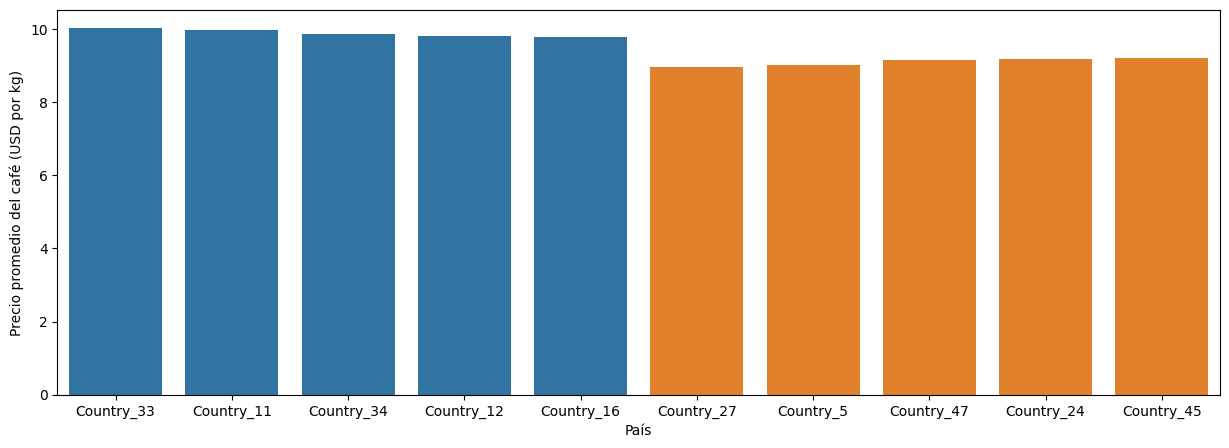

In [71]:
# Intentaremos determinar los países en los que el café es más caro por kg
# Para ello, necesitamos la columna de precio por kg

country_price = df.groupby('Country')['Average Coffee Price (USD per kg)'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(15, 5))
plt.xlabel('País')
plt.ylabel('Precio promedio del café (USD por kg)')

sns.barplot(x='Country', y='Average Coffee Price (USD per kg)', data=country_price.sort_values(by='Average Coffee Price (USD per kg)', ascending=False).head(5))
sns.barplot(x='Country', y='Average Coffee Price (USD per kg)', data=country_price.sort_values(by='Average Coffee Price (USD per kg)').head(5))
# No parece haber una diferencia clara en el precio del café por país, tomamos los 5 países con mayor y menor precio promedio y la diferencia no parece ser mucha.
#El precio promdedio del café disminuyó en $1 aproximadamente respecto a los más caros.


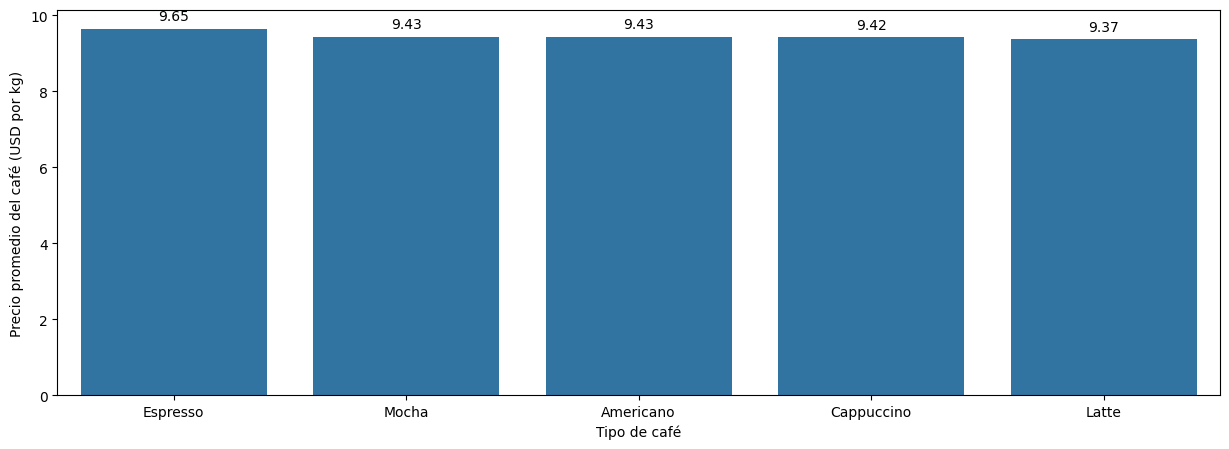

In [76]:
# Tipos de café más caros

coffee_price = df.groupby('Type of Coffee Consumed')['Average Coffee Price (USD per kg)'].mean().reset_index()
plt.figure(figsize=(15, 5))
plt.xlabel('Tipo de café')
plt.ylabel('Precio promedio del café (USD por kg)')
barplot = sns.barplot(x='Type of Coffee Consumed', y='Average Coffee Price (USD per kg)', data=coffee_price.sort_values(by='Average Coffee Price (USD per kg)', ascending=False).head(5))

# Agregar etiquetas de los valores
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Average Coffee Price (USD per kg)-log   R-squared:                       0.001
Model:                                               OLS   Adj. R-squared:                 -0.001
Method:                                    Least Squares   F-statistic:                    0.5678
Date:                                   Wed, 18 Sep 2024   Prob (F-statistic):              0.452
Time:                                           22:40:32   Log-Likelihood:                -174.19
No. Observations:                                    419   AIC:                             352.4
Df Residuals:                                        417   BIC:                             360.5
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               2.2261      0.071     31.406      0.000       2.087       2.365
Coffee Consumption (kg per capita per year)-log    -0.0302      0.040     -0.754      0.452      -0.109       0.049
==============================================================================
Omnibus:                       72.478   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.232
Skew:                          -0.392   Prob(JB):                     2.01e-06
Kurtosis:                       2.057   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

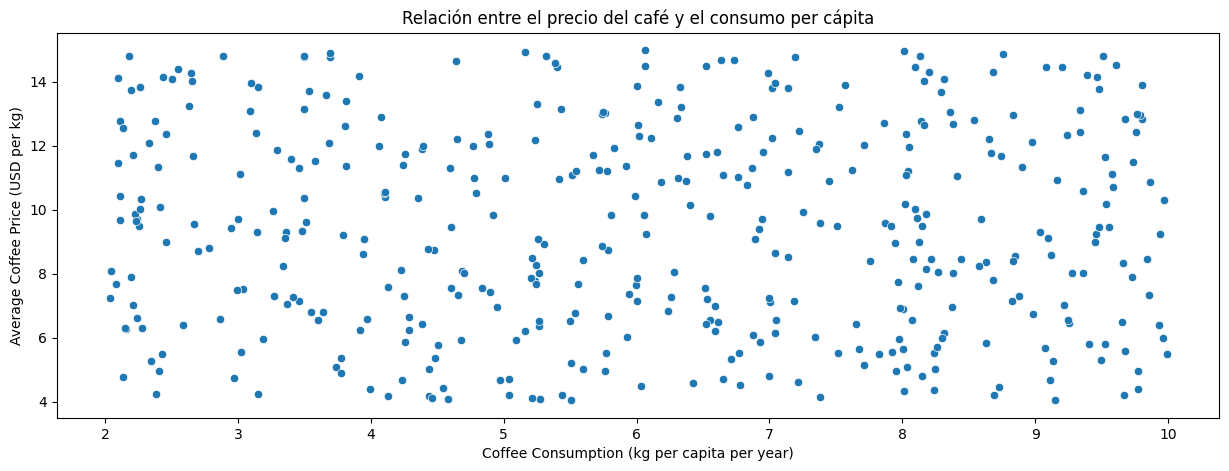

In [47]:
# Identificación de patrones y relaciones

# Relación entre el precio del café y el consumo per cápita

df_reg = df[(df['Year'] == 2023)][['Coffee Consumption (kg per capita per year)', 'Average Coffee Price (USD per kg)', 'Country', 'Population (millions)']]
df_reg['Average Coffee Price (USD per kg)-log'] = np.log(df_reg['Average Coffee Price (USD per kg)'])
df_reg['Coffee Consumption (kg per capita per year)-log'] = np.log(df_reg['Coffee Consumption (kg per capita per year)'])
plt.figure(figsize=(15, 5))
plt.title('Relación entre el precio del café y el consumo per cápita')
sns.scatterplot(x='Coffee Consumption (kg per capita per year)', y='Average Coffee Price (USD per kg)', data=df_reg)

x = df_reg['Coffee Consumption (kg per capita per year)-log']
y = df_reg['Average Coffee Price (USD per kg)-log']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

display(model.summary())


In [48]:

#Calcular el consumo total de café (kg per capita * población en millones)
df_reg['Total Coffee Consumption (kg)'] = df_reg['Coffee Consumption (kg per capita per year)'] * df_reg['Population (millions)']



<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Total Coffee Consumption (kg)-log   R-squared:                       0.664
Model:                                           OLS   Adj. R-squared:                  0.663
Method:                                Least Squares   F-statistic:                     823.2
Date:                               Wed, 18 Sep 2024   Prob (F-statistic):          9.64e-101
Time:                                       22:40:47   Log-Likelihood:                -388.93
No. Observations:                                419   AIC:                             781.9
Df Residuals:                                    417   BIC:                             789.9
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.2187      0.062     68.566      0.000       4.098       4.340
Population (millions)     0.0201      0.001     28.692      0.000       0.019       0.022
==============================================================================
Omnibus:                       75.229   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.714
Skew:                          -1.046   Prob(JB):                     6.81e-29
Kurtosis:                       4.747   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

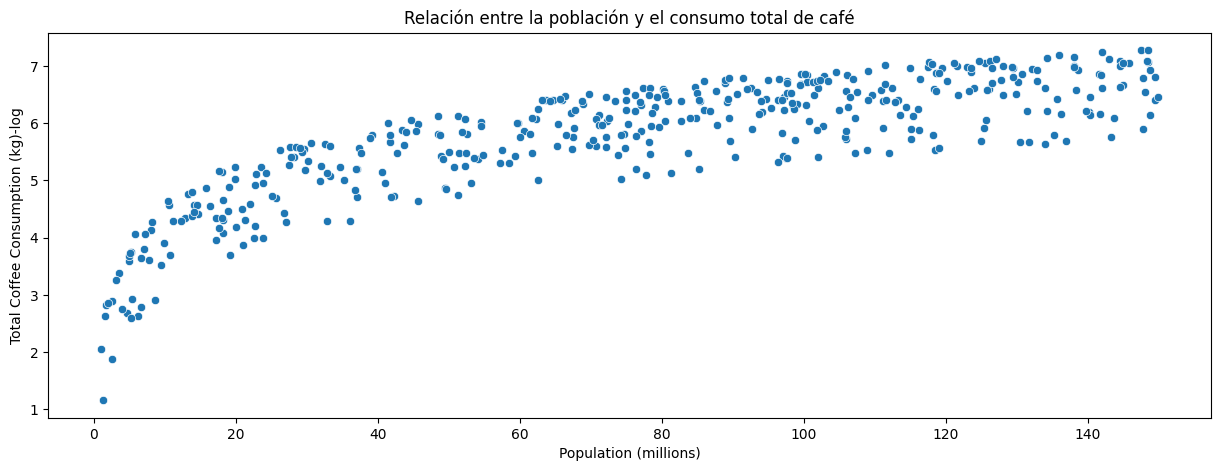

In [50]:
# Aplicar la transformación logarítmica

df_reg['Coffee Consumption (kg per capita per year)'] = np.log(df_reg['Coffee Consumption (kg per capita per year)'])
df_reg['Total Coffee Consumption (kg)-log'] = np.log(df_reg['Total Coffee Consumption (kg)'])

# Graficar la relación entre la población y el consumo total de café
plt.figure(figsize=(15, 5))
plt.title('Relación entre la población y el consumo total de café')
sns.scatterplot(x='Population (millions)', y='Total Coffee Consumption (kg)-log', data=df_reg)

# Realizar la regresión lineal entre la población y el consumo total de café
x_pop = df_reg['Population (millions)']
y_total = df_reg['Total Coffee Consumption (kg)-log']

# Añadir constante para el intercepto
x_pop = sm.add_constant(x_pop)

# Ajustar el modelo de regresión lineal
model_population = sm.OLS(y_total, x_pop).fit()

# Mostrar el resumen del modelo de regresión
model_population_summary = model_population.summary()
model_population_summary

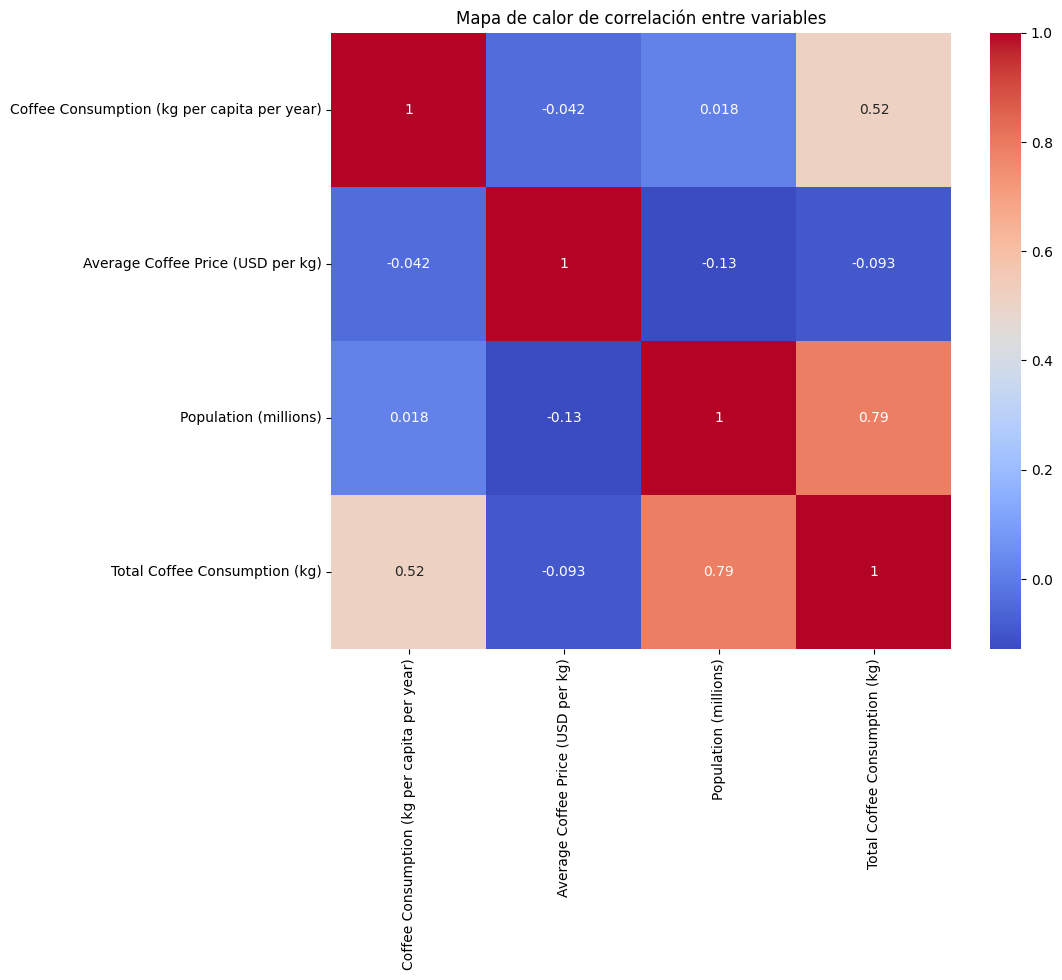

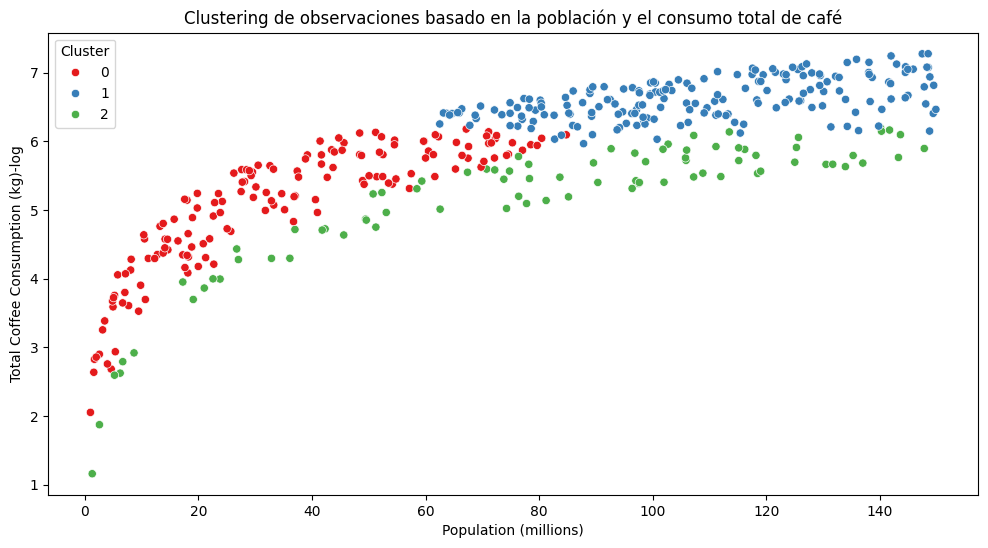

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_reg[['Coffee Consumption (kg per capita per year)', 
                    'Average Coffee Price (USD per kg)', 
                    'Population (millions)', 
                    'Total Coffee Consumption (kg)']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre variables')
plt.show()

# Normalizar los datos para clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reg[['Coffee Consumption (kg per capita per year)', 
                                         'Average Coffee Price (USD per kg)', 
                                         'Population (millions)', 
                                         'Total Coffee Consumption (kg)']])

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_reg['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualización del clustering en función de la población y el consumo total de café
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population (millions)', y='Total Coffee Consumption (kg)-log', hue='Cluster', data=df_reg, palette='Set1')
plt.title('Clustering de observaciones basado en la población y el consumo total de café')
plt.show()

In [62]:
# Revisemos los centroides del modelo y las características numéricas de cada cluster.
# Los centroides representan los valores medios de las características para cada cluster.

# Obtener los centroides del modelo K-Means
centroids = kmeans.cluster_centers_

# Convertir a DataFrame para facilitar la interpretación
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), 
                            columns=['Coffee Consumption (kg per capita per year)', 
                                     'Average Coffee Price (USD per kg)', 
                                     'Population (millions)', 
                                     'Total Coffee Consumption (kg)'])

# Mostrar los centroides que representan las características promedio de cada cluster
centroids_df

,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Population (millions),Total Coffee Consumption (kg)
0,0.571082,9.445771,35.419008,212.536707
1,0.662302,8.850299,108.236938,780.401474
2,-0.014235,10.410085,81.027707,230.344780
